In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

In [2]:
mnistData = load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
(X_train, y_train), (X_test, y_test) = mnistData

In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

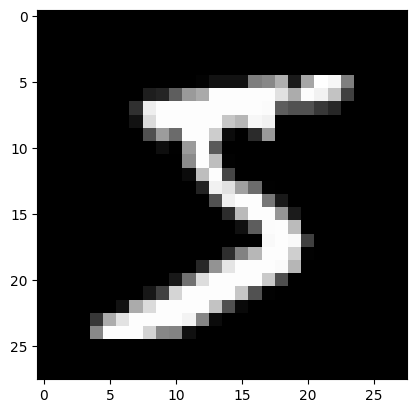

In [8]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# 학습용으로 변환
y_train_oh = to_categorical(y_train)
y_train_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [30]:
y_test_oh = to_categorical(y_test)
y_test_oh

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
y_train_oh.shape

(60000, 10)

In [13]:
X_train_R = X_train.reshape(-1, 28*28)
X_train_R.shape

(60000, 784)

In [32]:
X_test_R = X_test.reshape(-1, 28*28)
X_test_R.shape

(10000, 784)

In [14]:
# 학습
model = Sequential()
model.add(Dense(units = 64, input_dim = 784, activation = 'relu'))
model.add(Dense(units = 32, input_dim = 64, activation = 'relu'))
model.add(Dense(units = 10, input_dim = 32, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.fit(X_train_R, y_train_oh, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2078 - acc: 0.7978
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3109 - acc: 0.9177
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2229 - acc: 0.9389
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1893 - acc: 0.9481
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1645 - acc: 0.9541
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1461 - acc: 0.9593
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1344 - acc: 0.9622
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1213 - acc: 0.9662
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1150 - acc: 0.9684
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1056 - acc: 0.9708


In [16]:
from sklearn.metrics import classification_report, accuracy_score

In [27]:
model.predict(X_train_R)

1875/1875 [==============================] - 2s 911us/step


array([[6.6480397e-15, 2.8038088e-17, 5.3002257e-20, ..., 1.5411444e-17,
        1.3719041e-10, 7.4518290e-08],
       [9.9999487e-01, 0.0000000e+00, 2.7668573e-06, ..., 1.7777420e-07,
        6.1411498e-07, 2.9778786e-07],
       [4.0128830e-07, 4.8362922e-06, 2.4620809e-08, ..., 5.6706302e-08,
        2.6400633e-11, 9.1995638e-09],
       ...,
       [4.2166413e-11, 4.5784665e-14, 8.3349021e-16, ..., 1.4393895e-15,
        8.6244839e-08, 3.0841506e-06],
       [6.6540142e-06, 7.7826951e-07, 1.3102443e-06, ..., 1.5442931e-13,
        8.9480132e-08, 1.8157262e-12],
       [6.7848887e-04, 8.8828657e-04, 1.1415096e-03, ..., 1.5932868e-05,
        9.9270284e-01, 9.0663438e-04]], dtype=float32)

In [28]:
model.predict(X_train_R).argmax(axis = 1)

1875/1875 [==============================] - 2s 906us/step


array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [26]:
print(classification_report(y_train_oh.argmax(axis = 1), model.predict(X_train_R).argmax(axis = 1), digits = 10))

1875/1875 [==============================] - 2s 914us/step
              precision    recall  f1-score   support

           0  0.9845689366 0.9910518318 0.9877997476      5923
           1  0.9796307151 0.9915455354 0.9855521156      6742
           2  0.9769165965 0.9731453508 0.9750273270      5958
           3  0.9527896996 0.9776545425 0.9650619868      6131
           4  0.9474209651 0.9746662102 0.9608504894      5842
           5  0.9660985890 0.9725142963 0.9692958264      5421
           6  0.9730986383 0.9901993917 0.9815745394      5918
           7  0.9880355699 0.9754189944 0.9816867470      6265
           8  0.9785867238 0.9372756794 0.9574858141      5851
           9  0.9697022767 0.9307446630 0.9498241702      5949

    accuracy                      0.9717500000     60000
   macro avg  0.9716848711 0.9714216495 0.9714158763     60000
weighted avg  0.9718943151 0.9717500000 0.9716859740     60000



In [33]:
print(classification_report(y_test_oh.argmax(axis = 1), model.predict(X_test_R).argmax(axis = 1), digits = 10))

313/313 [==============================] - 0s 876us/step
              precision    recall  f1-score   support

           0  0.9709709710 0.9897959184 0.9802930773       980
           1  0.9765217391 0.9894273128 0.9829321663      1135
           2  0.9753694581 0.9593023256 0.9672691744      1032
           3  0.9311320755 0.9772277228 0.9536231884      1010
           4  0.9278048780 0.9684317719 0.9476831091       982
           5  0.9466073415 0.9540358744 0.9503070910       892
           6  0.9598765432 0.9739039666 0.9668393782       958
           7  0.9799398195 0.9503891051 0.9649382716      1028
           8  0.9750542299 0.9229979466 0.9483122363       974
           9  0.9521331946 0.9068384539 0.9289340102      1009

    accuracy                      0.9596000000     10000
   macro avg  0.9595410250 0.9592350398 0.9591131703     10000
weighted avg  0.9599751617 0.9596000000 0.9595134373     10000



In [36]:
# 학습
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(units = 64, input_dim = 784, activation = 'relu'))
model.add(Dense(units = 32, input_dim = 64, activation = 'relu'))
model.add(Dense(units = 10, input_dim = 32, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5429 - acc: 0.7568
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3869 - acc: 0.8974
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2502 - acc: 0.9327
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1956 - acc: 0.9474
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1665 - acc: 0.9547
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1491 - acc: 0.9594
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1311 - acc: 0.9635
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1160 - acc: 0.9680
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1072 - acc: 0.9705
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1015 - acc: 0.9725


In [39]:
model.predict(X_train)

1875/1875 [==============================] - 2s 919us/step


array([[3.83922259e-33, 2.62196462e-11, 6.54027088e-15, ...,
        1.00963846e-17, 1.66948748e-20, 1.06102775e-07],
       [9.99968171e-01, 1.95951084e-13, 4.68033164e-13, ...,
        4.43234027e-09, 1.67202757e-07, 4.59230449e-08],
       [1.76234386e-18, 4.43243807e-05, 7.75050801e-10, ...,
        4.19035082e-08, 1.58813786e-15, 1.78204073e-06],
       ...,
       [2.06055064e-29, 4.81351701e-19, 1.09839844e-22, ...,
        6.05752915e-26, 3.22108906e-15, 8.65903615e-08],
       [1.76393427e-04, 4.18881908e-11, 2.44433984e-09, ...,
        2.44805210e-14, 1.01579303e-06, 1.26391546e-08],
       [3.05696290e-06, 3.03547978e-08, 7.05044600e-09, ...,
        1.00566955e-09, 9.96564090e-01, 2.70253862e-03]], dtype=float32)

In [38]:
model.predict(X_train).shape

1875/1875 [==============================] - 2s 907us/step


(60000, 10)

In [41]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 51ms/step


array([7], dtype=int64)